<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [393]:
import numpy as np
import matplotlib.pyplot as plt

The numpy library is used to handle matrixes.

Matplotlib to plot and handle the plots of the data.

<b> Exercise 3.1: Read data and shuffle the rows in the raw data matrix. </b>

In [394]:
breastCancer = np.genfromtxt('breast_cancer.csv', delimiter=',')          # Read the breast_cancer.csv file.
np.random.shuffle(breastCancer)                                           # Shuffle rows in Python

 #print("X- values: ", breastCancerX)                                       # Print Xs.
 #print("Y-values: ", breastCancerY)                                        # Prints Ys.

The needed datas are set here. 

The breast_cancer.csv file is read using np.genfromtx.

The data is shuffled using np.random.shuffle(...)

<b> Exercise 3.2: Replace the responses 2 and 4 with 0 and 1 and divide the dataset into a training set and
a test set. How many observations did you allocated for testing, and why this number? </b>

In [395]:


for i in range(len(breastCancer)): 
    if  breastCancer[i][9] == 2:                                                # Check if current Y is 2. 
        breastCancer[i][9] = 0                                                  # If yes, change to 0.
    else:
        breastCancer[i][9] = 1                                                  # If no, change to 1.
#print(breastCancerY)                                                           # Print the changed Ys.
   

trainingSetX = np.array(breastCancer[:546,0:9])
trainingSetY = np.array(breastCancer[:546,9])
#for i in range(len(trainingSetY)):
# print(trainingSetY[i])

testSetX = breastCancer[546:,0:9]
testSetY = breastCancer[546:,9]

print("Training set shape X: " +str(trainingSetX.shape) +", Shape Y: " +str(trainingSetY.shape))
print("Test set shape X: " +str(testSetX.shape) +", Shape Y: " +str(testSetY.shape))

Training set shape X: (546, 9), Shape Y: (546,)
Test set shape X: (137, 9), Shape Y: (137,)


Y values are binary labels of either benign (2) or malignant (4), benign is changed to 0 and malignan is changed to 1.

The shape for the training set is  (546, 9).

The shape for the test set is (137, 9).

I chose to use 20 % of the data set for test and 80 % for training.

This is to get some variance between training and test data, and

at the same time have a large enough test set to compute with with a larger training set so that the alogorithm can be trained with a lot of features and labels.

<b> Exercise 3.3: Normalize the training data. </b>

In [396]:
def normalizeXData(dataX):
    meanValue = dataX.mean(axis=0)                                                  #   Compute mean µi.
    stadardDev = dataX.std(axis=0)                                                  #   Compute standard deviation σi.  
    return (dataX - meanValue)/stadardDev                                           # Compute normalized Xn in as Xn = (X − µ)/σ. 
                                                    
n = len(trainingSetX)                                                               # X-Rows.      
currentData = np.c_[np.ones((n, 1)), normalizeXData(trainingSetX)]                  # Array holding normalized data.

Here a normalization for the X-data is created. 
Column contining ones is also added for B0.

<b> Train a linear logistic regression model using gradient descent. </b>

In [397]:
def g(x):   # Logistic regression function g(M). Sigmoid function.
    return (np.exp(x)/(1 + np.exp(x)))

N = 10000       # Set hyperparameters N.
alpha = 0.01    # Set hyperparameter aplha.

costY = []      # Array holding cost for each iteration.
def gradientDescent(Xne, Y, Bj, N, alpha):
    for i in range(N):  # Compute N times.
        Bj = Bj - (np.dot(((alpha/n)*Xne.T), ((g(np.dot(Xne,Bj)))-Y))) # Compute gradient descent logisic regression  βj+1 = βj −(α/n)XT(g(Xβ) − y)
        cost = (-1/n) * (np.dot(Y.T, np.log(g(np.dot(Xne,Bj))))+np.dot((1-Y).T, np.log(1-g(np.dot(Xne,Bj)))))   # Calculate cost function
        costY.append(cost)  # Add cost to costY list.

    return Bj          # Return computed Bj.

Bj = np.zeros(len(currentData[0]))  # Set gradient descent start point as β = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Bgradient = gradientDescent(currentData, trainingSetY, Bj, N, alpha)       # Recieve B, created using gradient descent.
print("N = ", N)                            # Printing N that gave a 1 % margin.
print("Alpha = ", alpha)                    # Printing the alpha.

N =  10000
Alpha =  0.01


Here gradient descent is runing using the model and logistic regression.

The gradient descent iterates for 10000 times with a rate of 0.01

The cost function is also calculated and added in an array which will be used for the print.

<b> Print the hyperparameters α and Niter and plot the cost function J(β) as a
function over iterations.  </b>

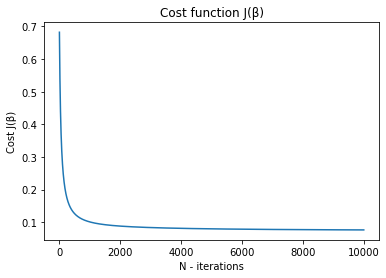

In [398]:
plt.plot(range(1, N + 1), costY)
plt.xlabel('N - iterations')
plt.ylabel('Cost J(β)')
plt.title("Cost function J(β)")
plt.show()

<b> Exercise 3.4: What is the training error (number of non-correct classifications in the training data) and
the training accuracy (percentage of correct classifications) for your model? </b>


In [399]:
predictedY = g(np.dot(currentData ,Bgradient))  # Predict all values using the beta from the gradient descent.

errors = 0   # Variable counting wrong predictions.
correct = 0 # Variable counting correct predictions.
for i in range(len(predictedY)):
    if  (predictedY[i] >= 0.5) == (trainingSetY[i]==1): # Check if the current prediction is correct.
        correct += 1                                    # If correct add 1 to correct.
    else:
        errors +=1                                       # If wrong add 1 to wrong.

print("Training set errors: " +str(errors))
print("Training set accuracy: " +str( round(100 *(correct/len(predictedY)),2)) +" %")


Training set errors: 15
Training set accuracy: 97.25 %


The training set gets around 12 to 18 errors for each computation.

That is an accuracy around 97+ % for the training set.

<b> Exercise 3.5: What is the number of test error and the test accuracy for your model? </b>


In [400]:
n = len(testSetX)                                                               # X-Rows.      
currentData = np.c_[np.ones((n, 1)), normalizeXData(testSetX)]                  # Array holding normalized data.

Bj = np.zeros(len(currentData[0]))  # Set gradient descent start point as β = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Bgradient = gradientDescent(currentData, testSetY, Bj, N, alpha)       # Recieve B, created using gradient descent.
predictedY = g(np.dot(currentData ,Bgradient))  # Predict all values using the beta from the gradient descent.

errors = 0   # Variable counting wrong predictions.
correct = 0 # Variable counting correct predictions.
for i in range(len(predictedY)):
    if  (predictedY[i] >= 0.5) == (testSetY[i]==1): # Check if the current prediction is correct.
        correct += 1                                    # If correct add 1 to correct.
    else:
        errors +=1                                       # If wrong add 1 to wrong.

print("Test set errors: " +str(errors))
print("Test set accuracy: " +str( round(100 *(correct/len(predictedY)),2)) +" %")


Test set errors: 3
Test set accuracy: 97.81 %


The test set gets around 0 to 7 errors for each computation.

That is an accuracy around 96+ % for the training set.

<b> Exercise 3.6: Repeated runs will (due to the shuffling) give different results. Are they qualitatively
the same? Do they depend on how many observations you put aside for testing? Is the
difference between training and testing expected?
 </b>

The training set is stuck at an accuracy of 97 %, no matter how many times i repeat the run the training set is always around 97 %.

The test set though can vary between 0 errors to 6 error, due to the shuffle round. A "good" shuffle round can give up to 100 % accuracy for the test set,

and a "bad" one can give an error around 95 %.

The changes above are mainly because of the shuffle, the shuffle trains  the models with new training and test data, which effects the accuracy.

Since this is a pretty good model and algorithm changing the size of the test and training data does not largely affect the accuracy.

Though a larger test set gives more errors in the test model, while there are less training erros.

Smaller test data, gives less errors but the accuracy maintains. The training data will here have more room for errors.
